In [1]:
# This is the code for PS4 of Dr. Parikh's computer vision class. 
# the code use part of the the polygonal region selection tools from https://github.com/jdoepfert/roipoly.py

# This script is to illustrate a couple of the provided functions, and to demonstrated loading a data file.

import numpy as np
import scipy.io
import glob
from scipy import misc
import matplotlib.pyplot as plt
from displaySIFTPatches import displaySIFTPatches
from selectRegion import roipoly
from getPatchFromSIFTParameters import getPatchFromSIFTParameters
from skimage.color import rgb2gray
import matplotlib.cm as cm
import pylab as pl
import imageio.v2 as imageio

# specific frame dir and siftdir
framesdir = '/Users/shashwatsinghranka/Documents/AGV Tasks/VideoSearch/frames/'
siftdir = '/Users/shashwatsinghranka/Documents/AGV Tasks/VideoSearch/sift/'


In [2]:
# Get a list of all the .mat file in that directory.
# there is one .mat file per image.

fnames = glob.glob(siftdir + '*.mat')
fnames = [i[-27:] for i in fnames]

print ('reading %d total files...' %(len(fnames)))

N = 100 #to visualize a sparser set of the features


reading 6612 total files...


reading frame 0 of 6612
imname = /Users/shashwatsinghranka/Documents/AGV Tasks/VideoSearch/frames/friends_0000002846.jpeg contains 1042 total features, each of dimension 128


IndexError: index 1 is out of bounds for axis 0 with size 1

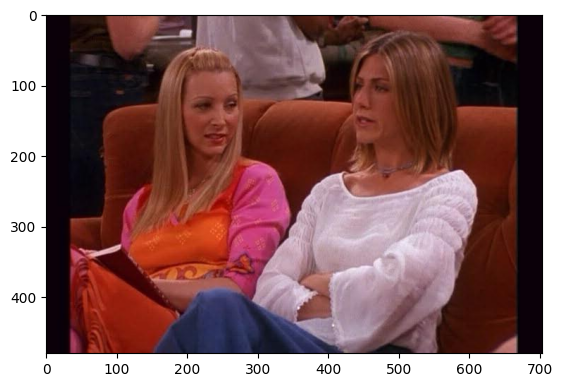

In [11]:
# Loop through all the data files found
for i in range(len(fnames)):
    print ('reading frame %d of %d' %(i, len(fnames)))
    
    # load that file
    fname = siftdir + fnames[i]
    
    mat = scipy.io.loadmat(fname)
    numfeats = mat['descriptors'].shape[0]
    
    #read the associated image
    imname = framesdir + fnames[i][:-4]
    im = imageio.imread(imname)

    # display the image and its SIFT features drawn as squares
    print ('imname = %s contains %d total features, each of dimension %d' %(imname, numfeats, mat['descriptors'].shape[1]))
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.imshow(im)
    coners = displaySIFTPatches(mat['positions'], mat['scales'], mat['orients'])
    
    for j in range(len(coners)):
        print
        ax.plot([coners[j][0][1], coners[j][1][1]], [coners[j][0][0], coners[j][1][0]], color='g', linestyle='-', linewidth=1)
        ax.plot([coners[j][1][1], coners[j][2][1]], [coners[j][1][0], coners[j][2][0]], color='g', linestyle='-', linewidth=1)
        ax.plot([coners[j][2][1], coners[j][3][1]], [coners[j][2][0], coners[j][3][0]], color='g', linestyle='-', linewidth=1)
        ax.plot([coners[j][3][1], coners[j][0][1]], [coners[j][3][0], coners[j][0][0]], color='g', linestyle='-', linewidth=1)
    ax.set_xlim(0, im.shape[1])
    ax.set_ylim(0, im.shape[0])
    plt.gca().invert_yaxis()
    
    plt.show()
    # now display the same image but only show N of the features
    print ('now showing a random subset of %d of those for visualization purposes only...' %(N))
    randinds = np.random.permutation(numfeats)
    fig=plt.figure()
    bx=fig.add_subplot(111)
    bx.imshow(im)
    coners = displaySIFTPatches(mat['positions'][randinds[:N],:], mat['scales'][randinds[:N],:], mat['orients'][randinds[:N],:])
    
    for j in range(len(coners)):
        bx.plot([coners[j][0][1], coners[j][1][1]], [coners[j][0][0], coners[j][1][0]], color='g', linestyle='-', linewidth=1)
        bx.plot([coners[j][1][1], coners[j][2][1]], [coners[j][1][0], coners[j][2][0]], color='g', linestyle='-', linewidth=1)
        bx.plot([coners[j][2][1], coners[j][3][1]], [coners[j][2][0], coners[j][3][0]], color='g', linestyle='-', linewidth=1)
        bx.plot([coners[j][3][1], coners[j][0][1]], [coners[j][3][0], coners[j][0][0]], color='g', linestyle='-', linewidth=1)
    bx.set_xlim(0, im.shape[1])
    bx.set_ylim(0, im.shape[0])  
    plt.gca().invert_yaxis()
    plt.show()
    
    
    # now show how to select a subset of the features using polygon drawing. 
    print ('nuse the mouse to draw a polygon, right click to end it')
    pl.imshow(im)
    MyROI = roipoly(roicolor='r')
    Ind = MyROI.getIdx(im, mat['positions'])
    
    # Ind contains the indices of the SIFT features whose centers fall
    # within the selected region of interest.
    # Note that these indices apply to the *rows* of 'descriptors' and
    # 'positions', as well as the entries of 'scales' and 'orients'
    # now display the same image but only in the polygon.
    
    fig=plt.figure()
    bx=fig.add_subplot(111)
    bx.imshow(im)
    coners = displaySIFTPatches(mat['positions'][Ind,:], mat['scales'][Ind,:], mat['orients'][Ind,:])

    for j in range(len(coners)):
        bx.plot([coners[j][0][1], coners[j][1][1]], [coners[j][0][0], coners[j][1][0]], color='g', linestyle='-', linewidth=1)
        bx.plot([coners[j][1][1], coners[j][2][1]], [coners[j][1][0], coners[j][2][0]], color='g', linestyle='-', linewidth=1)
        bx.plot([coners[j][2][1], coners[j][3][1]], [coners[j][2][0], coners[j][3][0]], color='g', linestyle='-', linewidth=1)
        bx.plot([coners[j][3][1], coners[j][0][1]], [coners[j][3][0], coners[j][0][0]], color='g', linestyle='-', linewidth=1)
    bx.set_xlim(0, im.shape[1])
    bx.set_ylim(0, im.shape[0])  
    plt.gca().invert_yaxis()
    plt.show()    
    
    
    # extract the image patch
    patch_num = 1
    img_patch = getPatchFromSIFTParameters(mat['positions'][patch_num,:], mat['scales'][patch_num], mat['orients'][patch_num], rgb2gray(im))
    
    plt.imshow(img_patch,  cmap = cm.Greys_r)
    plt.show()
    

In [ ]:
array([[[342.],
        [694.]]]), array([[[530.],
        [226.]]]), array([[[62.],
        [38.]]]), array([[[-126.],
        [ 506.]]])]